<a href="https://colab.research.google.com/github/rayhankwarta/analisis-breast-cancer-kaggle/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Machine Learning: Klasifikasi Kanker Payudara (Dataset Wisconsin)

*Notebook ini berisi analisis lengkap terhadap **Breast Cancer Wisconsin (Diagnostic) Dataset**. Tujuannya adalah untuk melakukan analisis data eksplorasi (EDA), pra-pemrosesan data, serta membangun dan mengevaluasi beberapa model machine learning untuk mengklasifikasikan tumor sebagai **jinak (Benign)** atau **ganas (Malignant)**.*

---

* **Dibuat oleh:** `[Rayhan Kwarta]`
* **Tanggal Dibuat:** `7 Agustus 2025`
* **Dataset:** [Breast Cancer Wisconsin (Diagnostic) Dataset](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)
* **Tujuan Utama:** Membangun model klasifikasi dengan akurasi tinggi untuk membantu dalam proses diagnosis dini kanker payudara.
* **Metodologi:**
    1.  Analisis Data Eksplorasi (EDA) & Visualisasi
    2.  Pra-pemrosesan Data (Scaling & Encoding)
    3.  Pelatihan Model (Logistic Regression, Random Forest, SVM)
    4.  Evaluasi Model (Confusion Matrix, Accuracy, Precision, Recall)
    5.  Kesimpulan

# Analisis Data Eksplorasi EDA & Visualisasi Data

In [ ]:
import os

# List the files in the dataset directory
dataset_path = "/kaggle/input/breast-cancer-dataset"
if os.path.exists(dataset_path):
    print(os.listdir(dataset_path))
else:
    print(f"Directory not found: {dataset_path}")

['Breast_cancer_dataset.csv']


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/Breast_cancer_dataset.csv")

# Display the first 5 rows of the DataFrame
display(df.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
# Drop the 'Unnamed: 32' column as it contains only missing values
df = df.drop('Unnamed: 32', axis=1)

# Display the DataFrame info to confirm the column has been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


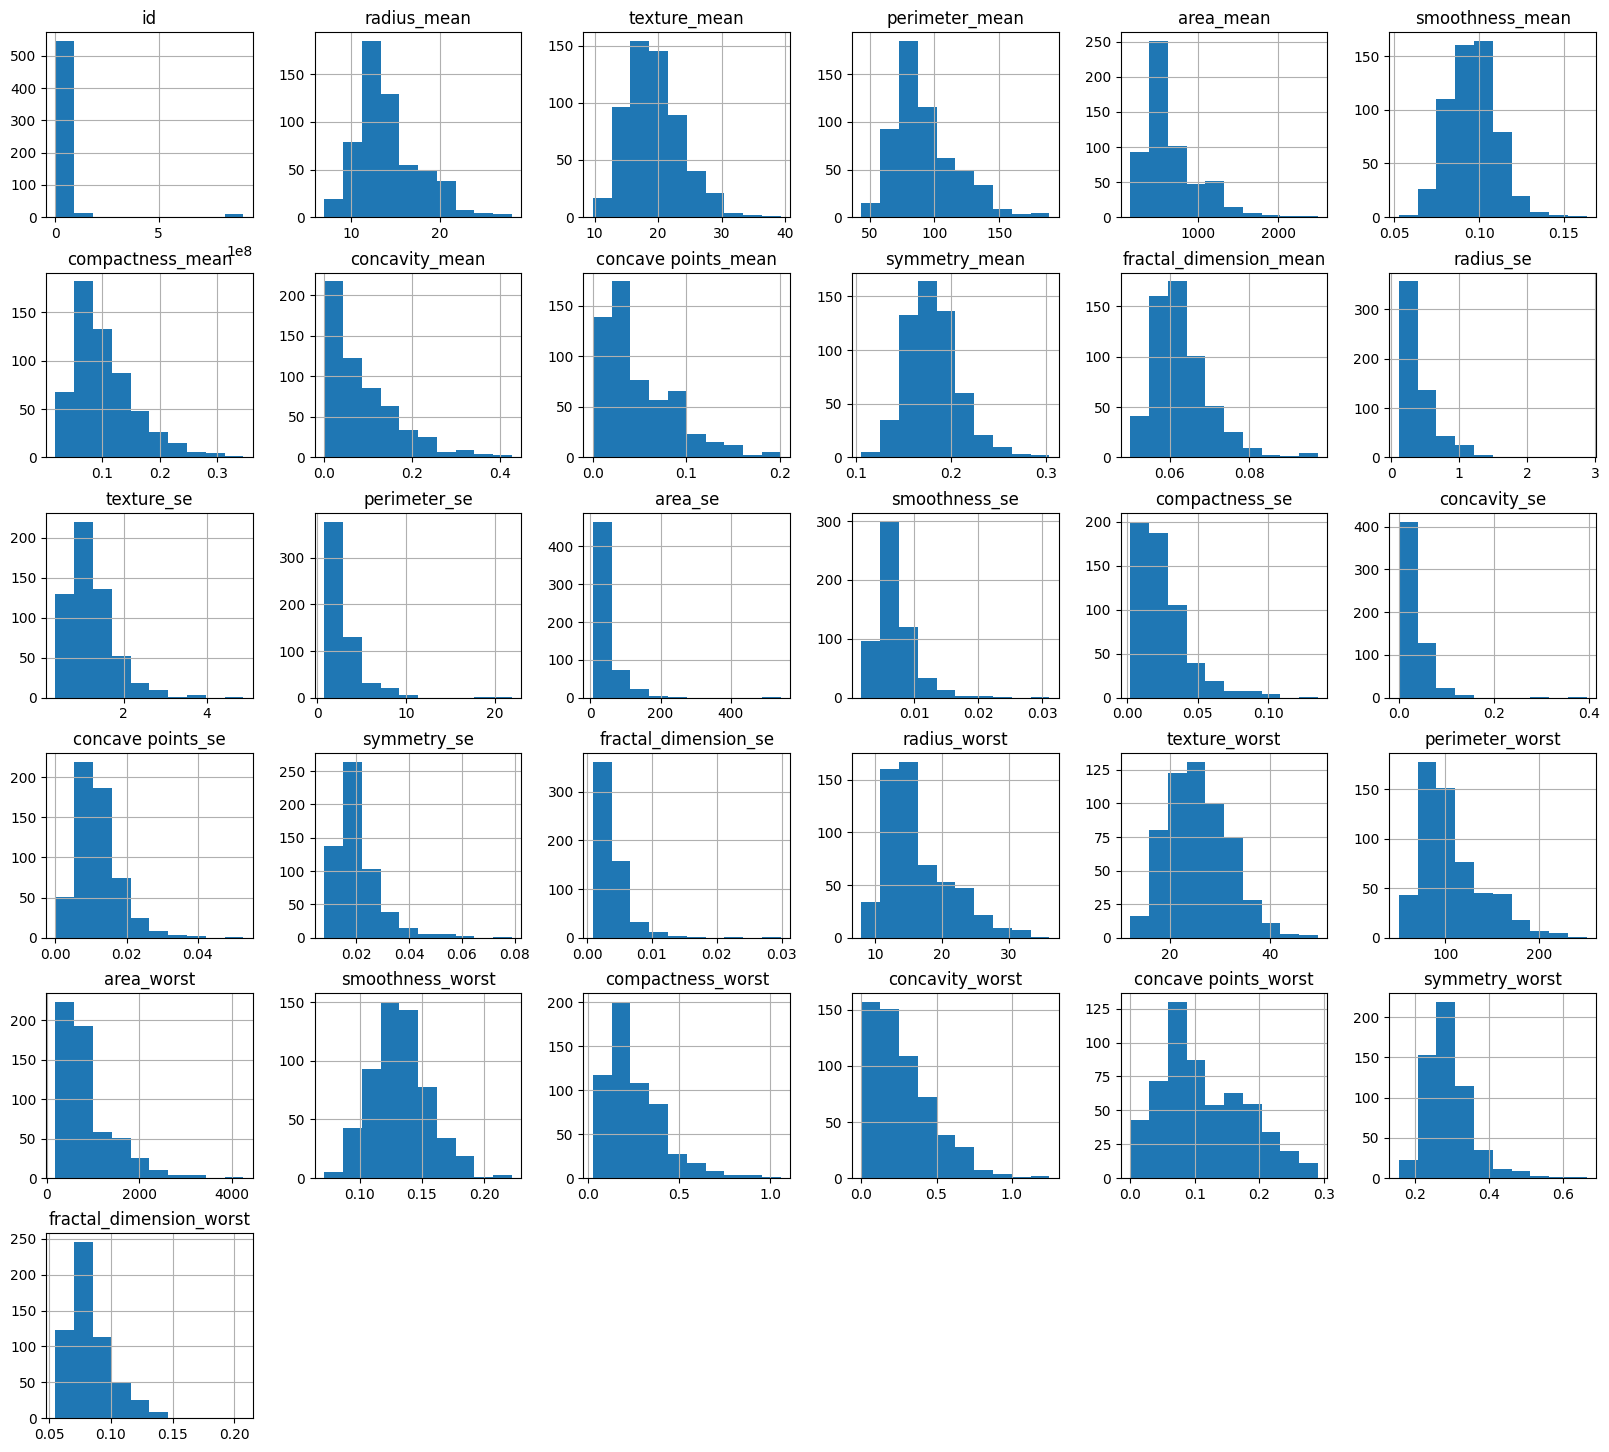

In [ ]:
df.hist(figsize=(20,18))
plt.show()

In [ ]:
category_counts = df['diagnosis'].value_counts()

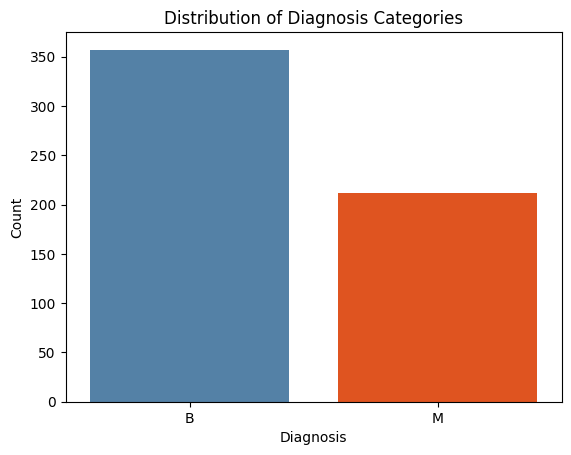

In [ ]:
# Count the occurrences of each diagnosis category
diagnosis_counts = df['diagnosis'].value_counts()

# Define a color palette: orange for 'M' and default for 'B'
colors = ['orangered' if label == 'M' else 'steelblue' for label in diagnosis_counts.index]

# Create a bar plot of the diagnosis counts with specified colors
sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values, palette=colors)
plt.title('Distribution of Diagnosis Categories')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

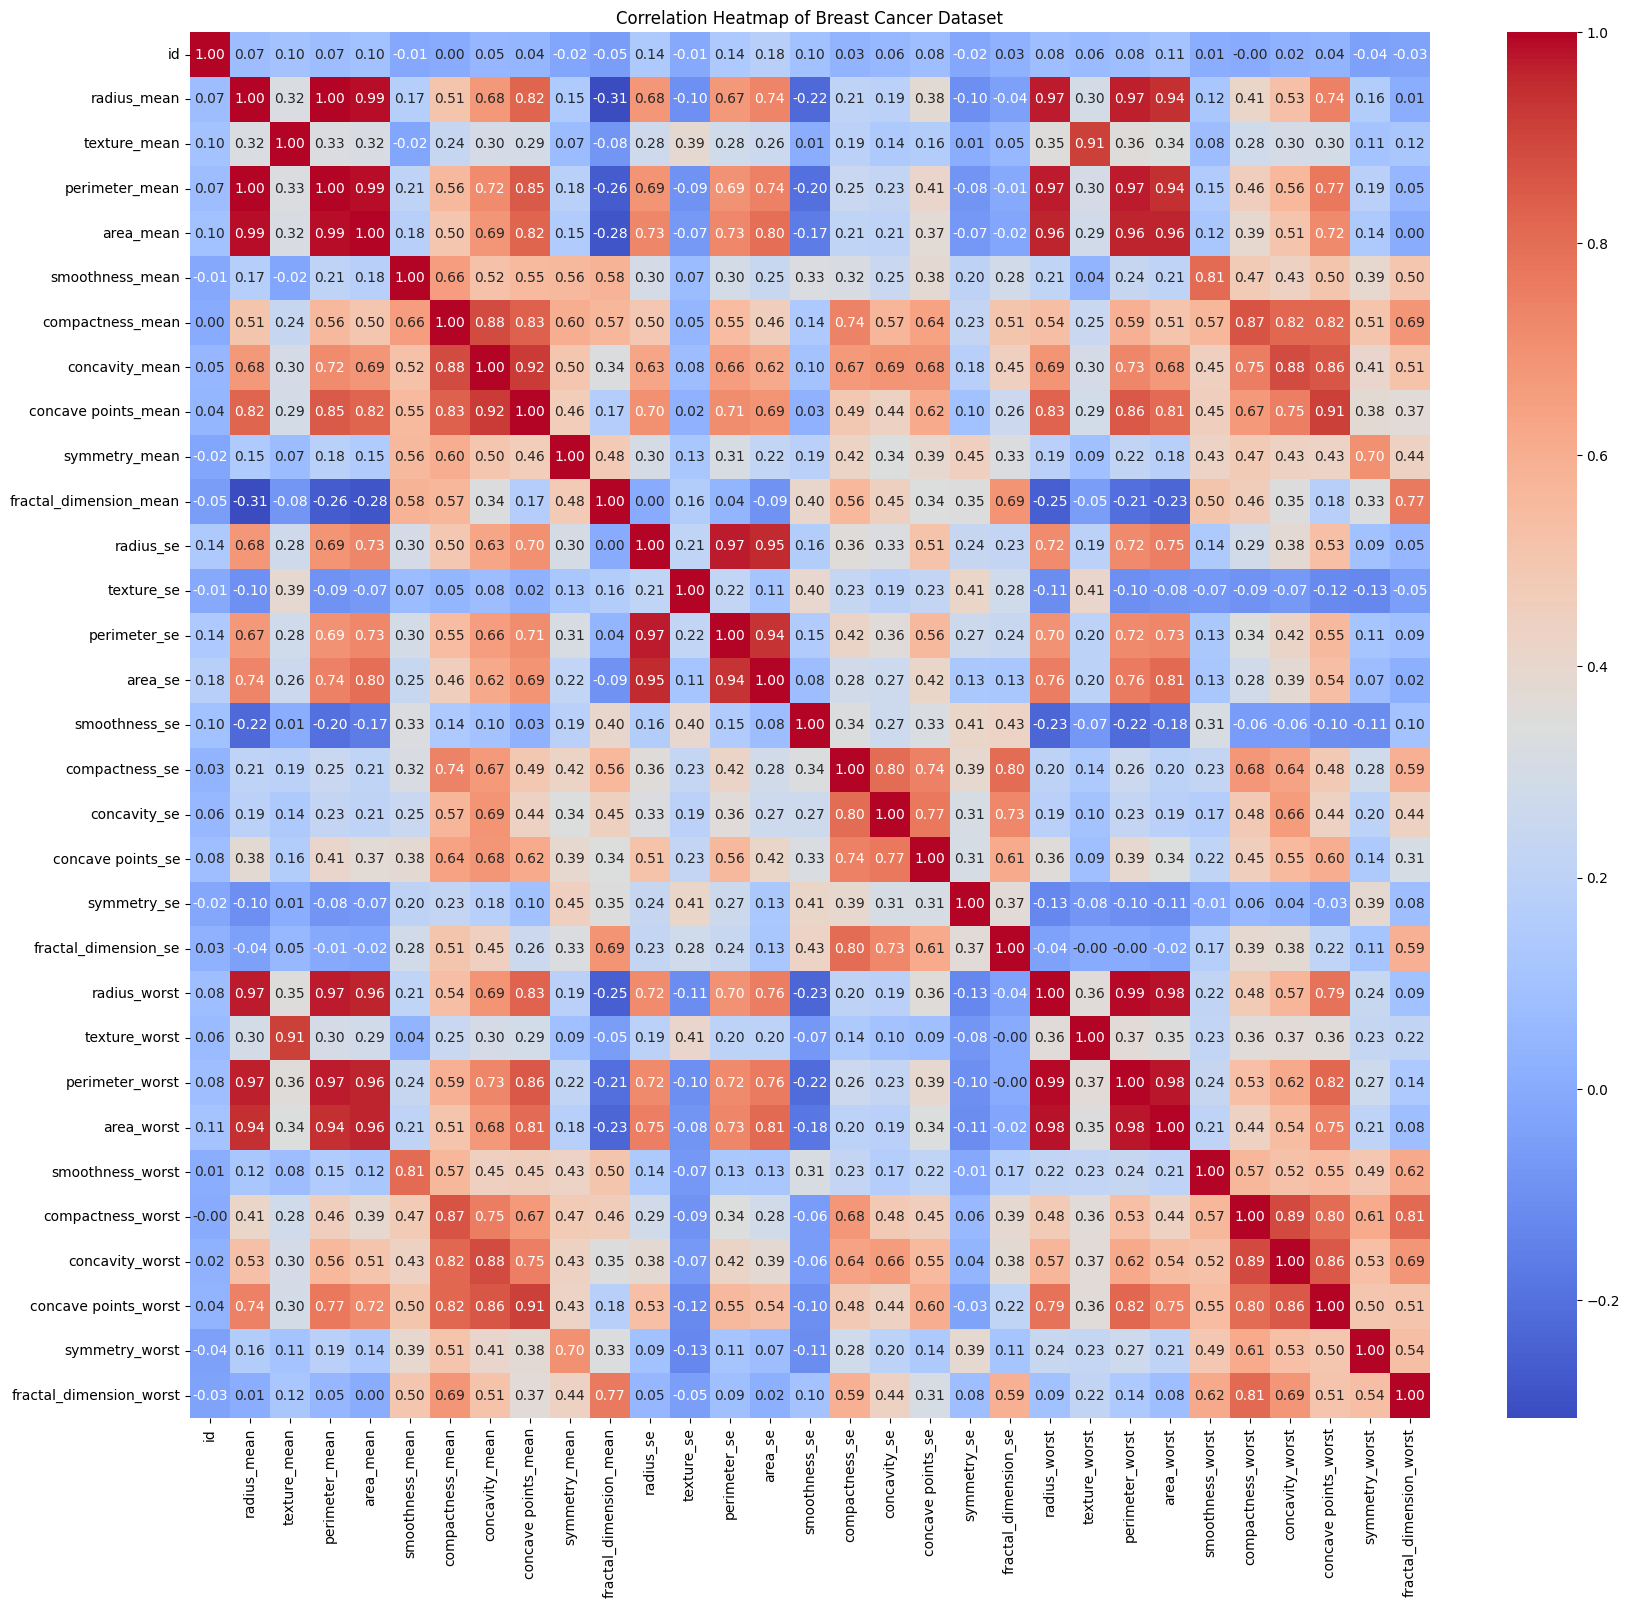

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Breast Cancer Dataset')
plt.show()

# Pra-pemrosesan Data (Scaling & Encoding)

## Pra-pemrosesan Data: Memisahkan Fitur dan Target

In [ ]:
# Separate features (X) and target (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Display the shapes of X and y
print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (569, 31)
Shape of target (y): (569,)


## Pra-pemrosesan Data: Encoding Target Variabel

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable 'diagnosis'
# 'M' (Malignant) will be encoded as 1 and 'B' (Benign) as 0
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Display the first few encoded target values and the classes found
print("First 5 encoded target values:", y_encoded[:5])
print("Classes encoded:", label_encoder.classes_)

First 5 encoded target values: [1 1 1 1 1]
Classes encoded: ['B' 'M']


## Pra-pemrosesan Data: Scaling Fitur Numerik

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for scaling (exclude 'id' if not needed for modeling)
# Based on df.info(), all columns except 'id' and 'diagnosis' are float64 (numerical)
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
# Remove 'id' if it's in the list and not intended as a feature
if 'id' in numerical_features:
    numerical_features.remove('id')

X_numerical = X[numerical_features]

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical features
X_scaled = scaler.fit_transform(X_numerical)

# Convert the scaled array back to a DataFrame for easier handling (optional but good practice)
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_features, index=X.index)

# Display the first few rows of the scaled features
print("First 5 rows of scaled features:")
display(X_scaled_df.head())

First 5 rows of scaled features:


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Data sekarang telah diproses: target variabel 'diagnosis' telah di-encode, dan fitur-fitur numerik telah di-scale. Data ini siap untuk tahap selanjutnya, yaitu pelatihan model machine learning.

# Pelatihan Model

## Membagi Data Menjadi Data Pelatihan dan Pengujian

In [ ]:
from sklearn.model_selection import train_test_split

# Use the scaled numerical features (X_scaled_df) and the encoded target (y_encoded)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (455, 30)
Shape of X_test: (114, 30)
Shape of y_train: (455,)
Shape of y_test: (114,)


## Melatih Model Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model (metrics will be displayed in the next evaluation stage)
print("Logistic Regression Model Trained.")

Logistic Regression Model Trained.


## Melatih Model Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model (metrics will be displayed in the next evaluation stage)
print("Random Forest Model Trained.")

Random Forest Model Trained.


## Melatih Model Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model (metrics will be displayed in the next evaluation stage)
print("SVM Model Trained.")

SVM Model Trained.


# Evaluasi Model

## Evaluasi Model Logistic Regression

In [ ]:
print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg))
print("Recall:", recall_score(y_test, y_pred_log_reg))
print("F1-score:", f1_score(y_test, y_pred_log_reg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression Model Evaluation:
Accuracy: 0.9649122807017544
Precision: 0.975
Recall: 0.9285714285714286
F1-score: 0.9512195121951219

Confusion Matrix:
 [[71  1]
 [ 3 39]]


## Evaluasi Model Random Forest

In [ ]:
print("\nRandom Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Model Evaluation:
Accuracy: 0.9736842105263158
Precision: 1.0
Recall: 0.9285714285714286
F1-score: 0.9629629629629629

Confusion Matrix:
 [[72  0]
 [ 3 39]]


## Evaluasi Model Support Vector Machine (SVM)

In [ ]:
print("\nSVM Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1-score:", f1_score(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Model Evaluation:
Accuracy: 0.9736842105263158
Precision: 1.0
Recall: 0.9285714285714286
F1-score: 0.9629629629629629

Confusion Matrix:
 [[72  0]
 [ 3 39]]


Setelah menjalankan sel-sel di atas, Anda dapat membandingkan metrik evaluasi untuk setiap model untuk menentukan model mana yang memiliki kinerja terbaik pada data pengujian.

# Kesimpulan

Berdasarkan metrik yang dihitung:

*   **Logistic Regression:**
    *   Accuracy: 0.9649
    *   Precision: 0.975
    *   Recall: 0.9286
    *   F1-score: 0.9512
    *   Confusion Matrix: [[71 1], [3 39]] (1 False Positive, 3 False Negatives)

*   **Random Forest:**
    *   Accuracy: 0.9737
    *   Precision: 1.0
    *   Recall: 0.9286
    *   F1-score: 0.9630
    *   Confusion Matrix: [[72 0], [3 39]] (0 False Positives, 3 False Negatives)

*   **SVM:**
    *   Accuracy: 0.9737
    *   Precision: 1.0
    *   Recall: 0.9286
    *   F1-score: 0.9630
    *   Confusion Matrix: [[72 0], [3 39]] (0 False Positives, 3 False Negatives)

**Kesimpulan:**

Berdasarkan metrik evaluasi pada data pengujian:

*   Model **Random Forest** dan **SVM** menunjukkan kinerja yang sedikit lebih baik dibandingkan Logistic Regression, dengan **Accuracy** dan **F1-score** yang lebih tinggi.
*   Kedua model (Random Forest dan SVM) mencapai **Precision** sempurna (1.0), yang berarti ketika mereka memprediksi kasus sebagai 'Malignant' (Ganas), prediksi tersebut selalu benar. Ini sangat penting dalam konteks diagnosis medis untuk menghindari positif palsu.
*   **Recall** untuk ketiga model adalah sama (0.9286), yang berarti mereka berhasil mengidentifikasi sekitar 92.86% dari kasus 'Malignant' yang sebenarnya. Ada 3 kasus 'Malignant' yang tidak terdeteksi (False Negatives) oleh ketiga model ini pada data pengujian.
*   Dilihat dari **Confusion Matrix**, Random Forest dan SVM tidak memiliki False Positive (memprediksi 'Malignant' padahal sebenarnya 'Benign'), sementara Logistic Regression memiliki 1 False Positive. Minimnya False Positive pada Random Forest dan SVM membuat mereka lebih disukai dalam skenario di mana menghindari diagnosis yang salah ('Malignant' padahal 'Benign') sangat krusial.

Meskipun perbedaannya kecil pada set pengujian ini, **Random Forest dan SVM** tampaknya memberikan kinerja yang sedikit lebih kuat dan lebih aman (dalam hal False Positives) untuk tugas klasifikasi ini dibandingkan Logistic Regression. Namun, penting untuk diingat bahwa ada 3 kasus Ganas yang tidak terdeteksi oleh ketiga model ini pada set pengujian. Untuk aplikasi diagnosis dini, mengurangi False Negatives (meningkatkan Recall) juga sangat penting.

Ini adalah kesimpulan berdasarkan data pengujian yang ada. Kinerja model dapat bervariasi dengan data baru.